<a href="https://colab.research.google.com/github/Fjolnirr/OliveTreeCounting/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install albumentations


In [29]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [30]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [31]:
image = cv2.imread("/content/drive/MyDrive/MSc/dataset/im_(1).jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'cat', 18: 'dog'}

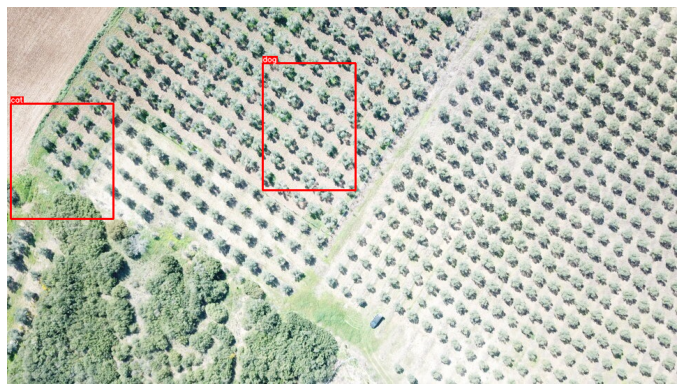

In [33]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [141]:
transform = A.Compose([
    A.RandomCrop(width=500, height=500),
    A.CLAHE(p=0.5),
    A.FancyPCA(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.GaussianBlur(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p=0.5),
    A.Superpixels(p=0.3),
    A.UnsharpMask(p=1),
    A.Sharpen(p=0.5),
    A.RingingOvershoot(p=0.5),
    A.RandomToneCurve(p=0.5),
    A.RandomShadow( p=0.5),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.5)
], bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['category_ids']))

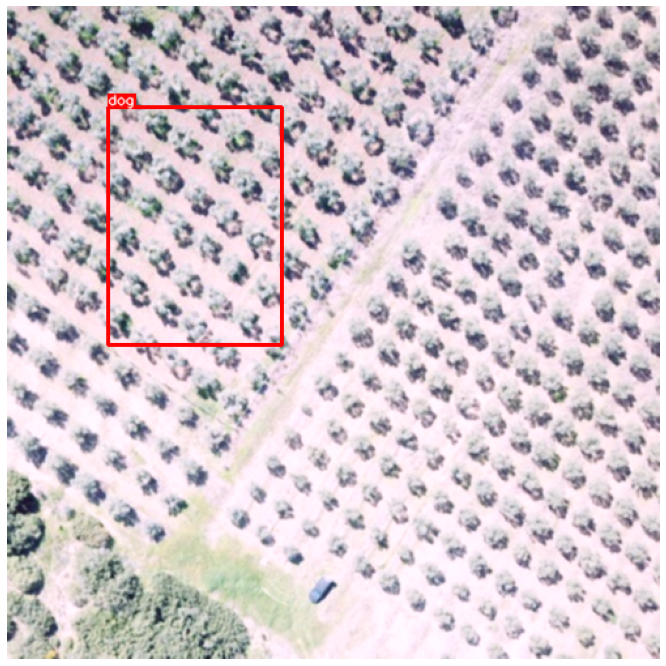

In [140]:
#random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)